# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [481]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import plotly.express as px

In [483]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')
df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [487]:
#A) seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [490]:
#seu código aqui
# 1. Verificar dados faltantes
print("Valores faltantes por coluna:")
print(df.isnull().sum())

# 2. Calcular a mediana da coluna 'Age' (ignorando valores faltantes)
median_age = df['Age'].median()
print(f"Mediana da coluna 'Age': {median_age}")

# 3. Imputar valores faltantes na coluna 'Age' com a mediana
df['Age'] = df['Age'].fillna(median_age)

# 4. Verificar novamente se há dados faltantes após o tratamento
print("\nValores faltantes após imputação:")
print(df.isnull().sum())

Valores faltantes por coluna:
Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
Mediana da coluna 'Age': 36.0

Valores faltantes após imputação:
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


In [492]:
#Fazendo o trtamento para os tipos corretos
df.Age = df.Age.astype(int)
df.Gender = df.Gender.astype(str)
df['Income'] = df['Income'].str.replace('.', '', regex=False)  # Remove pontos
df['Income'] = df['Income'].str.replace(',', '.', regex=False)  # Troca vírgula por ponto

# Converte para float
df['Income'] = pd.to_numeric(df['Income'], downcast='float')
df['Income'] = df['Income'] / 1000 #Isso foi feito para que o gráfico seja mais possivel de visualizar

In [494]:
50.000,00

(50.0, 0)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    int32  
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float32
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float32(1), int32(1), int64(1), object(5)
memory usage: 9.1+ KB


O conjunto de dados contém 149 linhas, das quais aproximadamente 28 (18,8%) possuem valores faltantes na coluna Idade. Excluir essas linhas reduziria o conjunto para 121 linhas, o que representa uma perda significativa de dados (quase 19%). Essa redução poderia comprometer a representatividade do conjunto, especialmente se os dados faltantes não forem completamente aleatórios

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [500]:
#seu código aqui
# Listar colunas categóricas
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

# Verificar valores únicos em cada coluna categórica
for column in categorical_columns:
    print(f"\nValores únicos na coluna '{column}':")
    print(df[column].unique())


Valores únicos na coluna 'Gender':
['Female' 'Male']

Valores únicos na coluna 'Education':
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Valores únicos na coluna 'Marital Status':
['Single' 'Married']

Valores únicos na coluna 'Home Ownership':
['Rented' 'Owned']

Valores únicos na coluna 'Credit Score':
['High' 'Average' 'Low']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [503]:
#seu código aqui
# Imputar valores faltantes na coluna 'Age' com a mediana
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Selecionar variáveis numéricas
numeric_columns = ['Age', 'Income' ,'Number of Children']

# Aplicar describe() às variáveis numéricas
print("Estatísticas descritivas das variáveis numéricas:")
print(df[numeric_columns].describe())

Estatísticas descritivas das variáveis numéricas:
              Age      Income  Number of Children
count  164.000000  164.000000          164.000000
mean    37.195122   83.765244            0.652439
std      7.586619   32.457306            0.883346
min     25.000000   25.000000            0.000000
25%     31.750000   57.500000            0.000000
50%     36.000000   83.750000            0.000000
75%     43.000000  105.000000            1.000000
max     53.000000  162.500000            3.000000


In [507]:
def plot_numeric_distributions(
    df: pd.DataFrame, 
    numeric_columns: list[str], 
    figsize: tuple[int, int] = (12, 10),
    hist_color: str = '#1f77b4',
    box_color: str = '#ff7f0e',
    hist_bins: int = 30
) -> None:
  
    plt.style.use('ggplot')
    
    # Create figure with subplots for histograms and boxplots
    fig, axes = plt.subplots(len(numeric_columns), 2, figsize=figsize)
    
    # Ensure axes is always a 2D array (even if there's only one row)
    if len(numeric_columns) == 1:
        axes = [axes]

    # Plot histograms and boxplots for each numeric variable
    for i, column in enumerate(numeric_columns):
        # Histogram with KDE
        sns.histplot(
            df[column], 
            ax=axes[i][0], 
            kde=True, 
            color=hist_color,
            bins=hist_bins
        )
        axes[i][0].set_title(f'Histogram of {column}')
        axes[i][0].set_xlabel(column)
        axes[i][0].set_ylabel('Frequency')

        # Limita o número de marcas no eixo X do histograma
        axes[i][0].xaxis.set_major_locator(MaxNLocator(nbins=20))
        
        # Boxplot
        sns.boxplot(
            x=df[column], 
            ax=axes[i][1], 
            color=box_color
        )
        axes[i][1].set_title(f'Boxplot of {column}')
        axes[i][1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

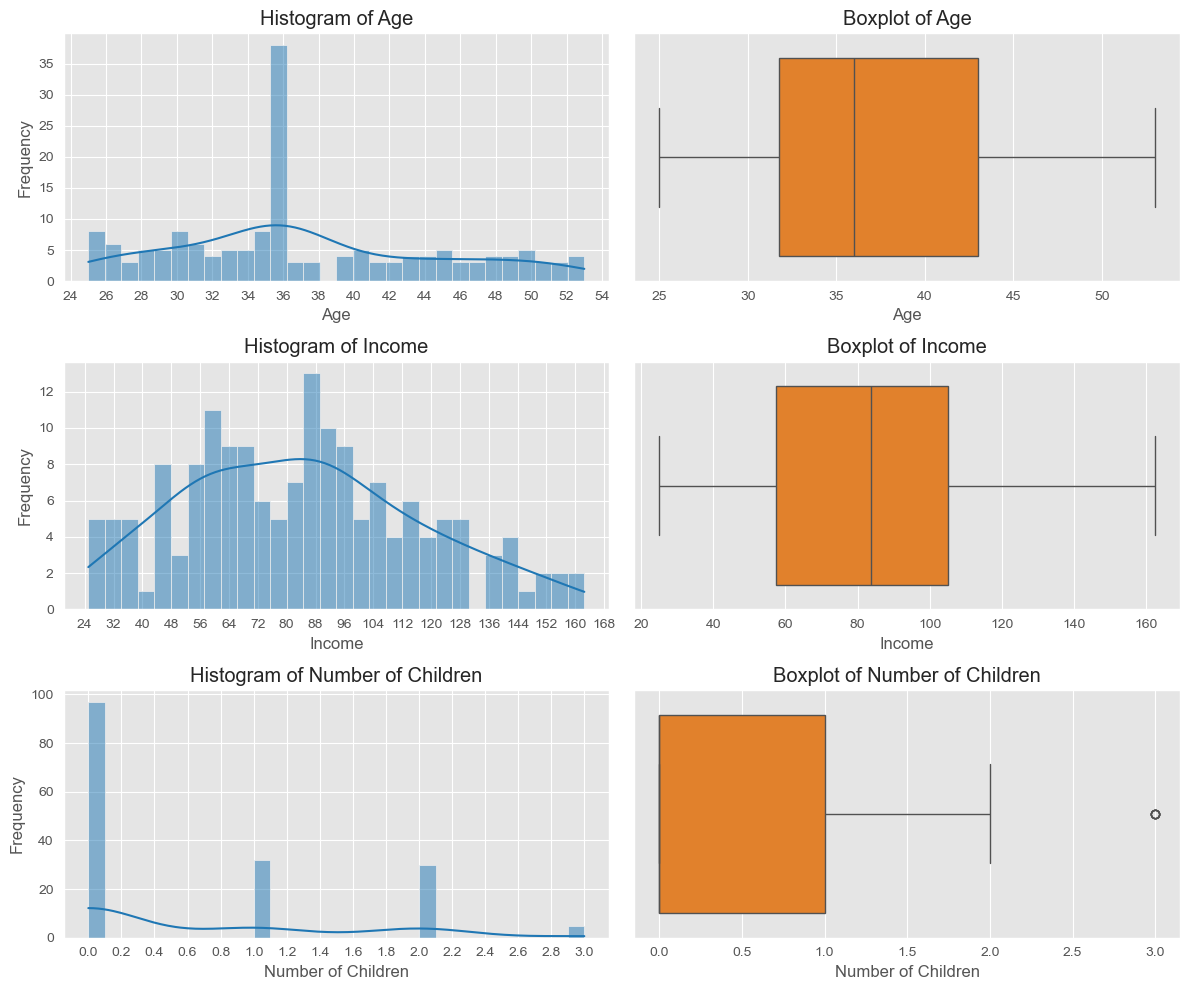

In [509]:
plot_numeric_distributions(df=df, numeric_columns=numeric_columns)

In [430]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100.0,Master's Degree,Married,2,Owned,High
2,35,Female,75.0,Doctorate,Married,1,Owned,High
3,40,Male,125.0,High School Diploma,Single,0,Owned,High
4,45,Female,100.0,Bachelor's Degree,Married,3,Owned,High


**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

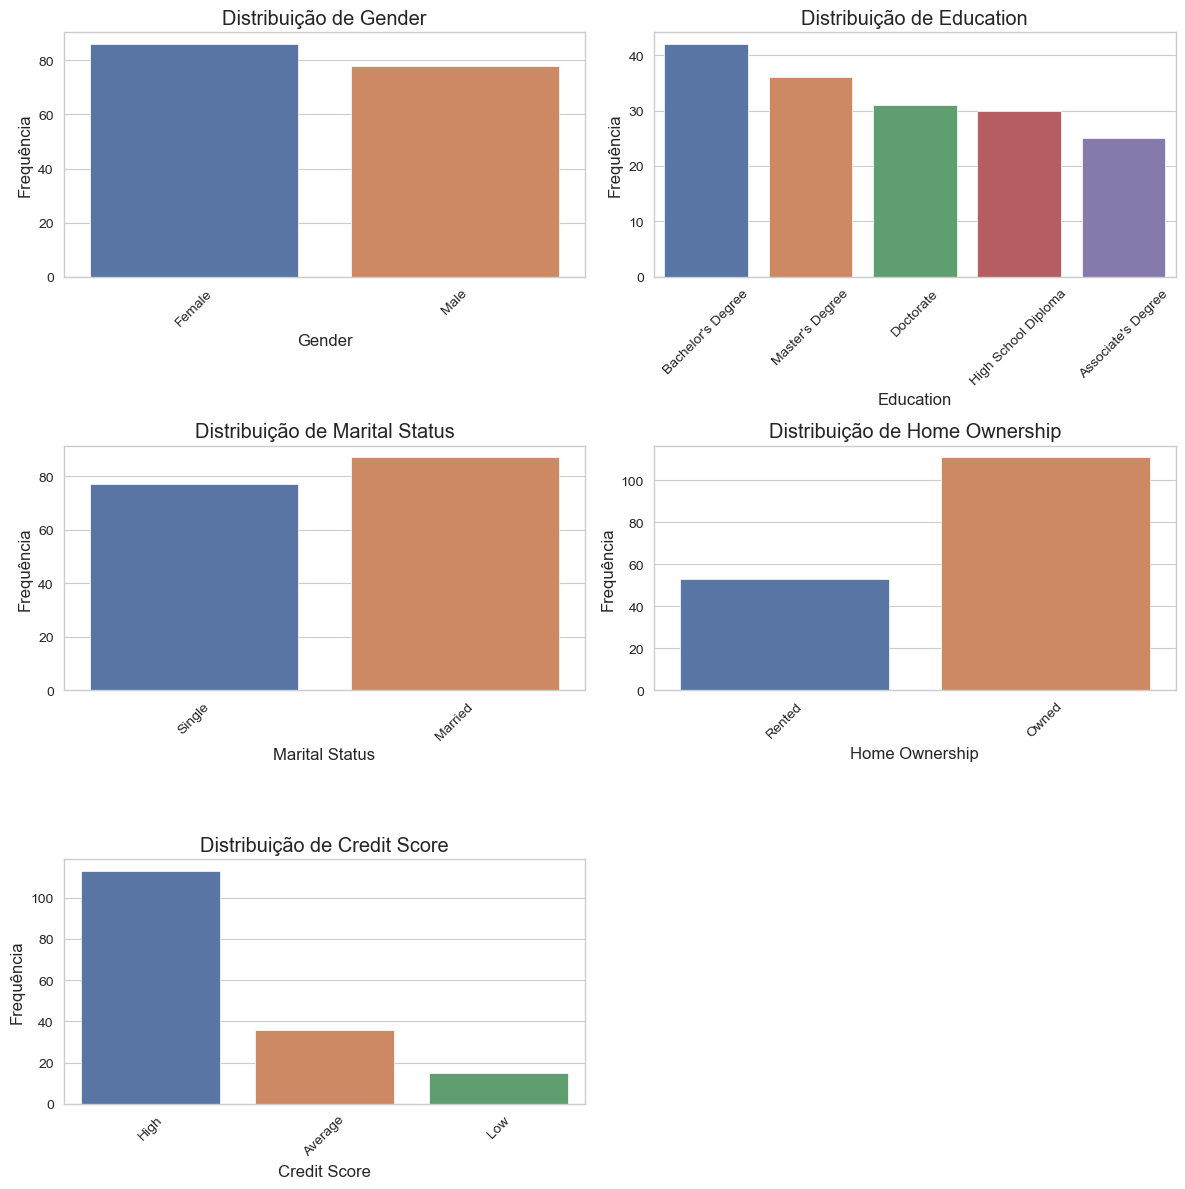


Frequência de categorias em 'Gender':
Gender
Female    86
Male      78
Name: count, dtype: int64

Frequência de categorias em 'Education':
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

Frequência de categorias em 'Marital Status':
Marital Status
Married    87
Single     77
Name: count, dtype: int64

Frequência de categorias em 'Home Ownership':
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Frequência de categorias em 'Credit Score':
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


In [433]:
#seu código aqui
# Selecionar variáveis categóricas
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

# Configurar estilo do Seaborn
sns.set_style('whitegrid')

# Criar figura com subplots para os gráficos de barras
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # Achatar o array de eixos para facilitar a iteração

# Plotar gráficos de barras para cada variável categórica
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue=column, palette='deep', legend=False)
    axes[i].set_title(f'Distribuição de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequência')
    axes[i].tick_params(axis='x', rotation=45)

# Remover o último subplot vazio (se houver)
if len(categorical_columns) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Exibir contagem de frequência para cada variável categórica
for column in categorical_columns:
    print(f"\nFrequência de categorias em '{column}':")
    print(df[column].value_counts())

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [435]:
#seu código aqui
outliers_children = df[df['Number of Children'] == 3]
print(f"Número de indivíduos com 3 filhos: {len(outliers_children)}")

Número de indivíduos com 3 filhos: 5


In [436]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Verificar outliers em 'Number of Children'
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Limites para 'Number of Children': [{lower_bound}, {upper_bound}]")
outliers = df[(df['Number of Children'] < lower_bound) | (df['Number of Children'] > upper_bound)]
print(f"\nLinhas com outliers em 'Number of Children':")
print(outliers)

Limites para 'Number of Children': [-1.5, 2.5]

Linhas com outliers em 'Number of Children':
     Age  Gender  Income          Education Marital Status  \
4     45  Female   100.0  Bachelor's Degree        Married   
33    45  Female   105.0  Bachelor's Degree        Married   
65    45  Female   110.0  Bachelor's Degree        Married   
97    45  Female   115.0  Bachelor's Degree        Married   
139   45  Female   105.0  Bachelor's Degree        Married   

     Number of Children Home Ownership Credit Score  
4                     3          Owned         High  
33                    3          Owned         High  
65                    3          Owned         High  
97                    3          Owned         High  
139                   3          Owned         High  


Sim, a análise de outliers foi realizada, e os outliers na coluna Number of Children (valores = 3) foram identificados. No entanto, não foi aplicado nenhum tratamento (exclusão, imputação ou capping), pois os valores são plausíveis, representam um subgrupo válido e não comprometem a análise.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



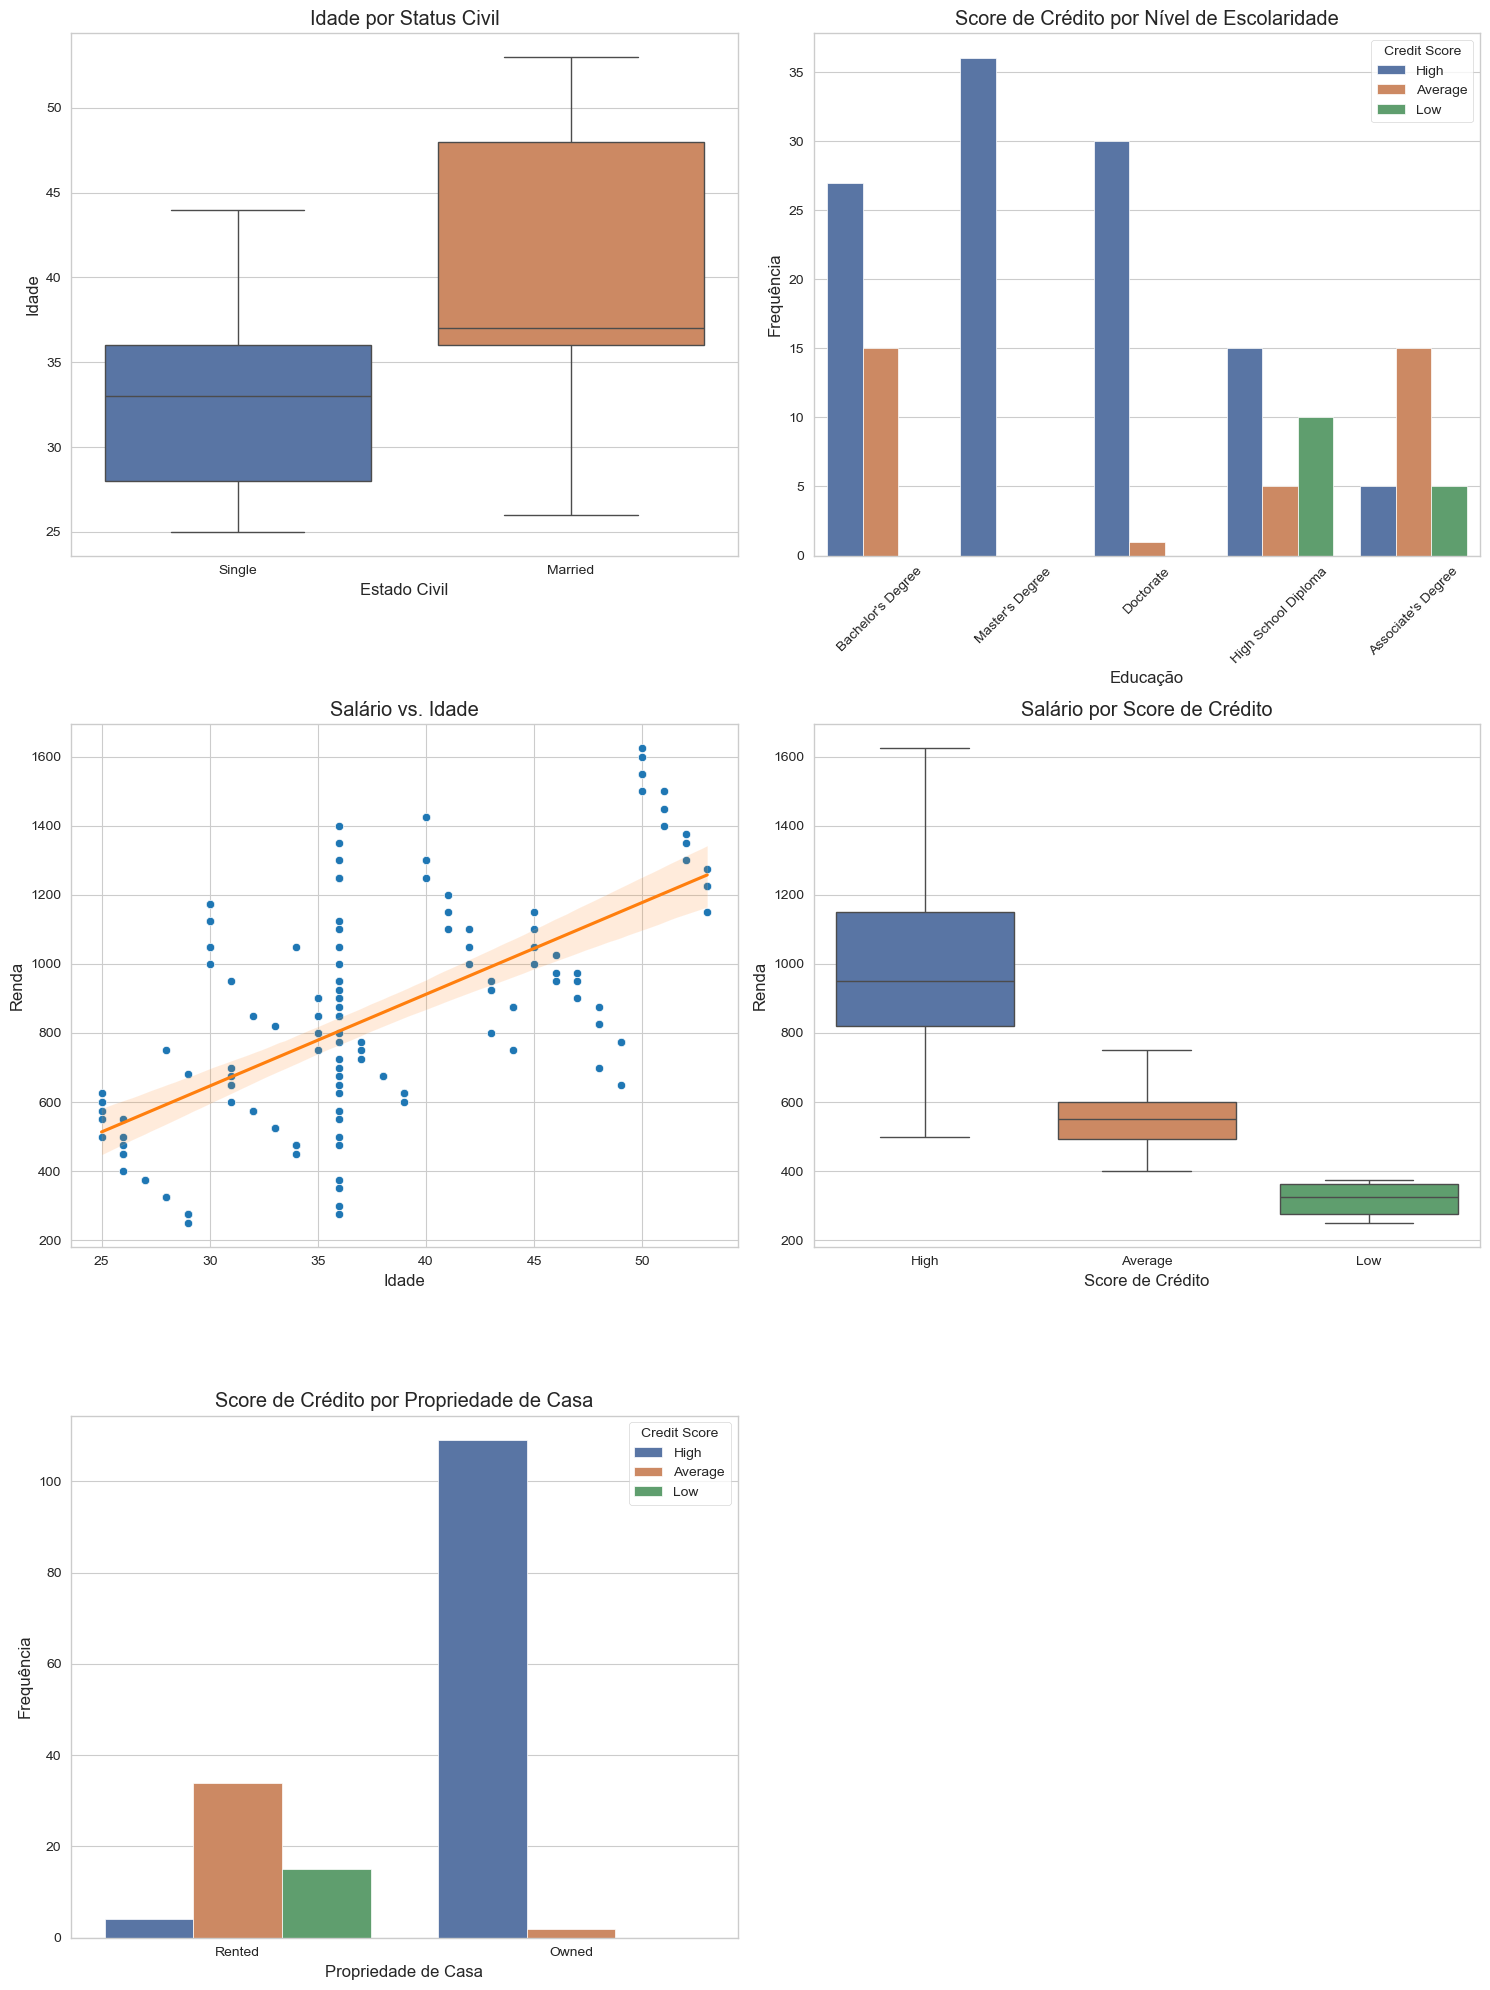


Tabela de Contingência: Score de Crédito vs. Educação
Credit Score         Average  High  Low
Education                              
Associate's Degree        15     5    5
Bachelor's Degree         15    27    0
Doctorate                  1    30    0
High School Diploma        5    15   10
Master's Degree            0    36    0

Tabela de Contingência: Score de Crédito vs. Propriedade de Casa
Credit Score    Average  High  Low
Home Ownership                    
Owned                 2   109    0
Rented               34     4   15


In [441]:
#seu código aqui

# Imputar valores faltantes na coluna 'Age' com a mediana
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Converter 'Income' para float, tratando o formato brasileiro (e.g., 50.000,00)
df['Income'] = df['Income'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Configurar estilo do Seaborn
sns.set_style('whitegrid')

# Criar figura com subplots para as análises
fig = plt.figure(figsize=(15, 20))

# 1. Relação entre Idade e Status Civil (numérica vs. categórica)
plt.subplot(3, 2, 1)
sns.boxplot(x='Marital Status', y='Age', data=df, hue='Marital Status', palette='deep')
plt.title('Idade por Status Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Idade')

# 2. Relação entre Score de Crédito e Nível de Escolaridade (categórica vs. categórica)
plt.subplot(3, 2, 2)
sns.countplot(x='Education', hue='Credit Score', data=df, palette='deep')
plt.title('Score de Crédito por Nível de Escolaridade')
plt.xlabel('Educação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# 3. Relação entre Salário e Idade (numérica vs. numérica)
plt.subplot(3, 2, 3)
sns.scatterplot(x='Age', y='Income', data=df, color='#1f77b4')
sns.regplot(x='Age', y='Income', data=df, scatter=False, color='#ff7f0e')
plt.title('Salário vs. Idade')
plt.xlabel('Idade')
plt.ylabel('Renda')

# 4. Relação entre Salário e Score de Crédito (numérica vs. categórica)
plt.subplot(3, 2, 4)
sns.boxplot(x='Credit Score', y='Income', data=df, hue='Credit Score', palette='deep')
plt.title('Salário por Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Renda')

# 5. Relação entre Propriedade de Casa e Score de Crédito (categórica vs. categórica)
plt.subplot(3, 2, 5)
sns.countplot(x='Home Ownership', hue='Credit Score', data=df, palette='deep')
plt.title('Score de Crédito por Propriedade de Casa')
plt.xlabel('Propriedade de Casa')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Exibir tabelas de contingência para relações categóricas
print("\nTabela de Contingência: Score de Crédito vs. Educação")
print(pd.crosstab(df['Education'], df['Credit Score']))

print("\nTabela de Contingência: Score de Crédito vs. Propriedade de Casa")
print(pd.crosstab(df['Home Ownership'], df['Credit Score']))

Idade e Status Civil:
Gráfico: Boxplot mostra casados com mediana de idade (~43 anos) maior que solteiros (~31 anos).
Insight: Casados são mais velhos, refletindo estágios da vida que podem impactar decisões financeiras. Implicação: Idade pode influenciar análises de crédito para casados, especialmente para empréstimos de longo prazo.

Score de Crédito e Nível de Escolaridade:
Gráfico: Countplot mostra que Doctorate e Bachelor's Degree têm alta proporção de Credit Score = High, enquanto High School Diploma tem mais Low.
Insight: Níveis educacionais mais altos estão associados a melhores scores. Implicação: Educação é um preditor de risco de crédito, útil para segmentação.

Salário e Idade:
Gráfico: Scatterplot com linha de regressão mostra correlação positiva fraca, com rendas mais altas em idades mais avançadas.
Insight: Idade tem influência moderada na renda, mas outros fatores (e.g., educação) são relevantes. Implicação: Combinar idade com outras variáveis pode melhorar previsões.

Salário e Score de Crédito:
Gráfico: Boxplot mostra rendas mais altas para Credit Score = High (mediana ~95.000) e mais baixas para Low (~32.500).
Insight: Renda é um forte indicador de pontuação de crédito. Implicação: Renda é um fator chave na avaliação de risco.

Casa Própria e Score de Crédito:
Gráfico: Countplot mostra que 88% dos proprietários têm Credit Score = High, enquanto alugueis têm mais Average e Low.
Insight: Posse de casa própria está fortemente associada a scores altos, indicando estabilidade financeira. Implicação: Propriedade de casa é um indicador de baixo risco.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

 O número de filhos influencia a pontuação de crédito?
Justificativa: O número de filhos pode afetar as despesas familiares e, consequentemente, a capacidade de manter um bom score de crédito. Explorar essa relação pode revelar se famílias maiores enfrentam maior risco financeiro. 

Existe relação entre gênero e renda?
Justificativa: Diferenças de renda entre gêneros podem indicar desigualdades ou padrões demográficos que afetam o perfil financeiro dos clientes, influenciando estratégias de segmentação.

O nível de escolaridade está relacionado à posse de casa própria?
Justificativa: A educação pode estar associada à estabilidade financeira, e a posse de casa própria é um indicador de saúde financeira. Essa relação pode reforçar a importância da educação na análise de crédito.

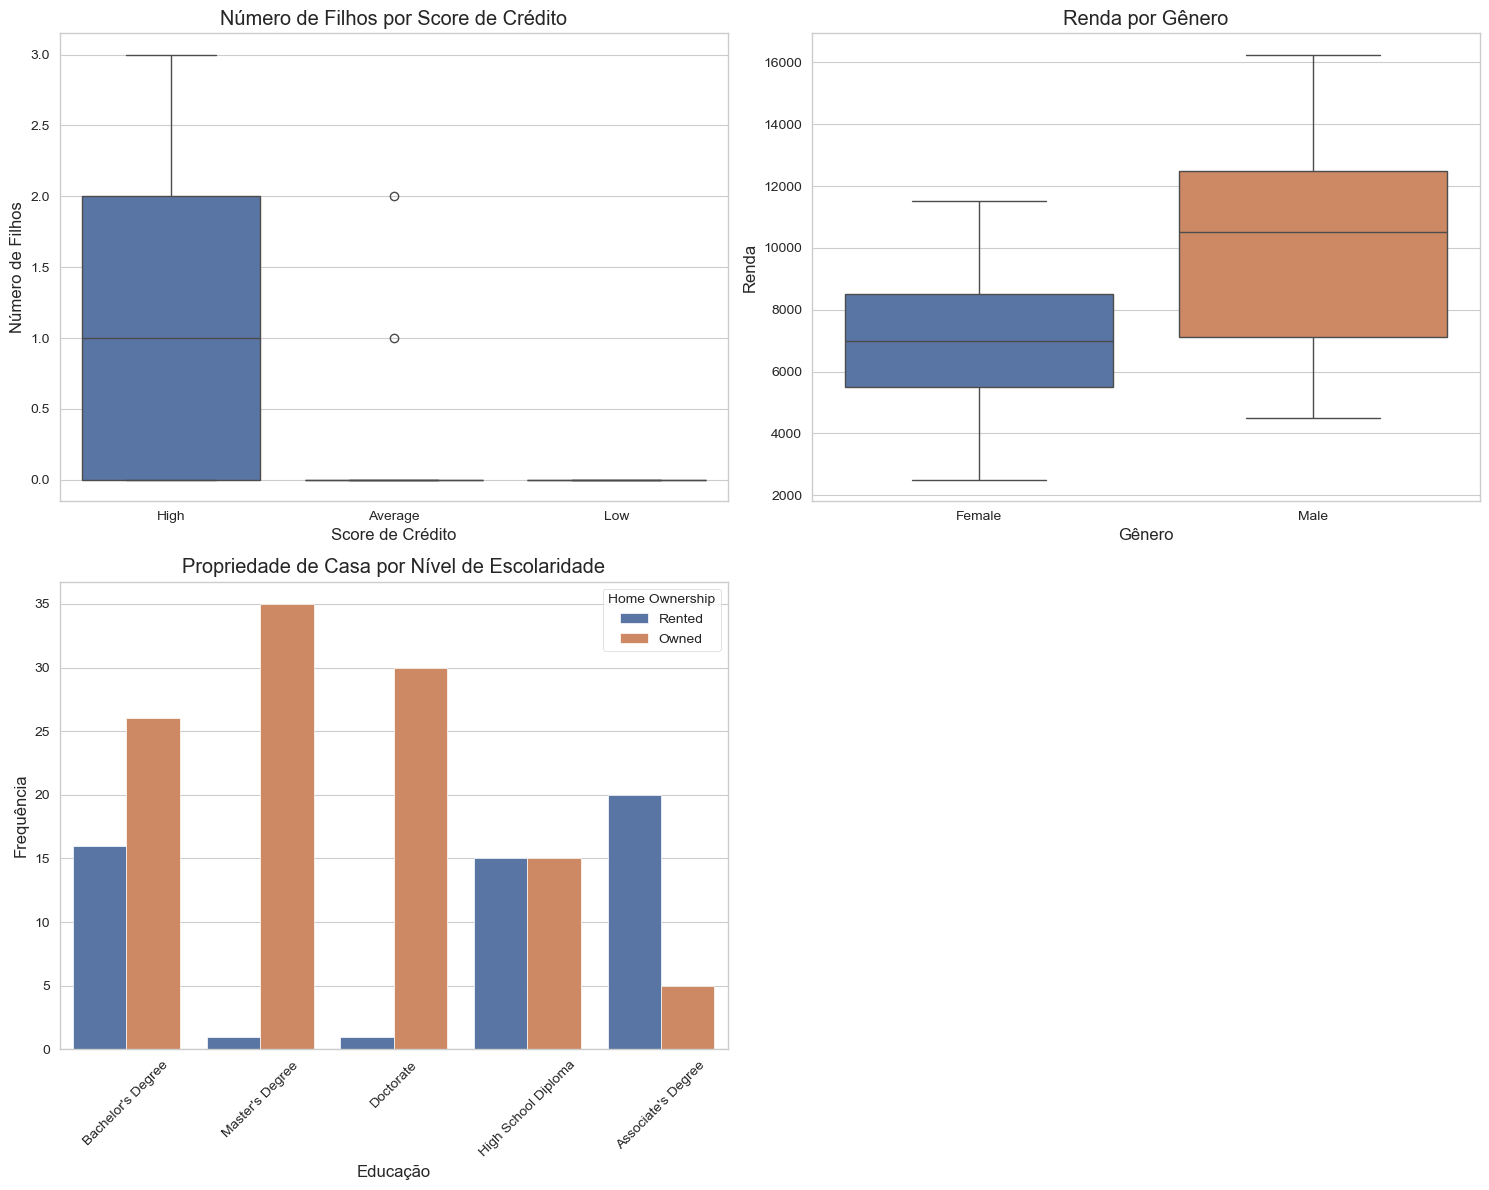


Tabela de Contingência: Score de Crédito vs. Número de Filhos
Credit Score        Average  High  Low
Number of Children                    
0                        34    48   15
1                         1    31    0
2                         1    29    0
3                         0     5    0

Tabela de Contingência: Educação vs. Propriedade de Casa
Home Ownership       Owned  Rented
Education                         
Associate's Degree       5      20
Bachelor's Degree       26      16
Doctorate               30       1
High School Diploma     15      15
Master's Degree         35       1


In [447]:
# seu código aqui
# Converter 'Income' para float, tratando o formato brasileiro (e.g., 50.000,00)
df['Income'] = df['Income'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Configurar estilo do Seaborn
sns.set_style('whitegrid')

# Criar figura com subplots para as análises
fig = plt.figure(figsize=(15, 12))

# 1. Número de Filhos vs. Score de Crédito (numérica vs. categórica)
plt.subplot(2, 2, 1)
sns.boxplot(x='Credit Score', y='Number of Children', data=df, hue='Credit Score', palette='deep')
plt.title('Número de Filhos por Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Número de Filhos')

# 2. Gênero vs. Renda (categórica vs. numérica)
plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='Income', data=df, hue='Gender', palette='deep')
plt.title('Renda por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Renda')

# 3. Educação vs. Propriedade de Casa (categórica vs. categórica)
plt.subplot(2, 2, 3)
sns.countplot(x='Education', hue='Home Ownership', data=df, palette='deep')
plt.title('Propriedade de Casa por Nível de Escolaridade')
plt.xlabel('Educação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Exibir tabelas de contingência para relações categóricas
print("\nTabela de Contingência: Score de Crédito vs. Número de Filhos")
print(pd.crosstab(df['Number of Children'], df['Credit Score']))

print("\nTabela de Contingência: Educação vs. Propriedade de Casa")
print(pd.crosstab(df['Education'], df['Home Ownership']))

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

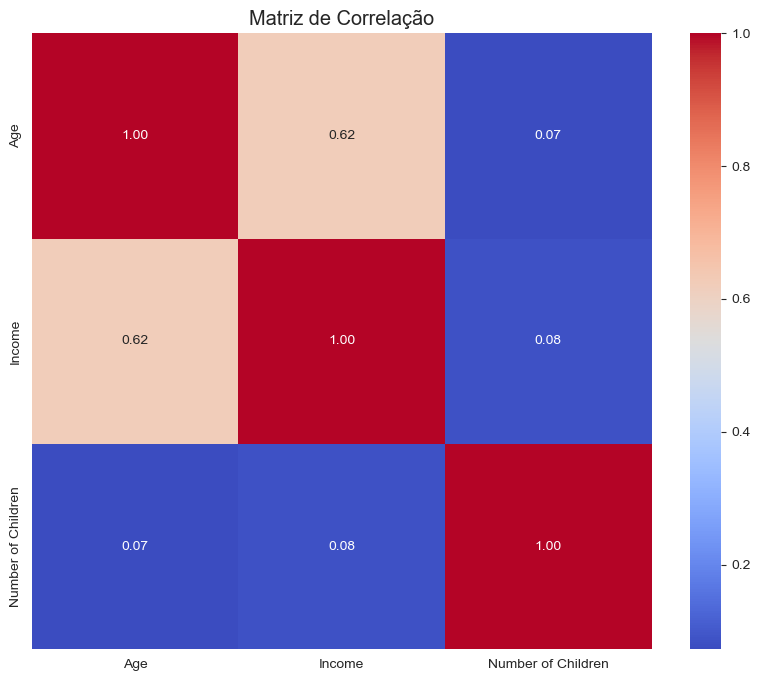

In [449]:
#seu código aqui
df.select_dtypes(include=['number']).corr()

correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

# sua justificativa aqui
Faz sentido que "Age" e "Income" tenham uma correlação moderada. Em geral, à medida que as pessoas envelhecem, elas acumulam mais experiência profissional, o que pode levar a salários mais altos. No entanto, essa correlação não é alta (próxima de 1,00) porque outros fatores, como nível de educação, setor de trabalho ou localização geográfica, também influenciam a renda, independentemente da idade.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [458]:
# Identificar colunas categóricas
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

# Criar um dicionário para armazenar os LabelEncoders
label_encoders = {}

# Aplicar LabelEncoder para cada coluna categórica
for column in categorical_columns:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column].astype(str))  # Converter para string para evitar erros com NaN
    label_encoders[column] = le  # Armazenar o encoder para referência futura

# Excluir as colunas categóricas originais
df = df.drop(columns=categorical_columns)

# Exibir as primeiras linhas do dataset tratado
print("\nDataset após codificação e exclusão das colunas categóricas:")
print(df.head())

# Exibir os mapeamentos usados pelo LabelEncoder
print("\nMapeamentos do LabelEncoder:")
for column, le in label_encoders.items():
    print(f"{column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Dataset após codificação e exclusão das colunas categóricas:
   Age   Income  Number of Children  Gender_encoded  Education_encoded  \
0   25   5000.0                   0               0                  1   
1   30  10000.0                   2               1                  4   
2   35   7500.0                   1               0                  2   
3   40  12500.0                   0               1                  3   
4   45  10000.0                   3               0                  1   

   Marital Status_encoded  Home Ownership_encoded  Credit Score_encoded  
0                       1                       1                     1  
1                       0                       0                     1  
2                       0                       0                     1  
3                       1                       0                     1  
4                       0                       0                     1  

Mapeamentos do LabelEncoder:
Gender: {'Female': 

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

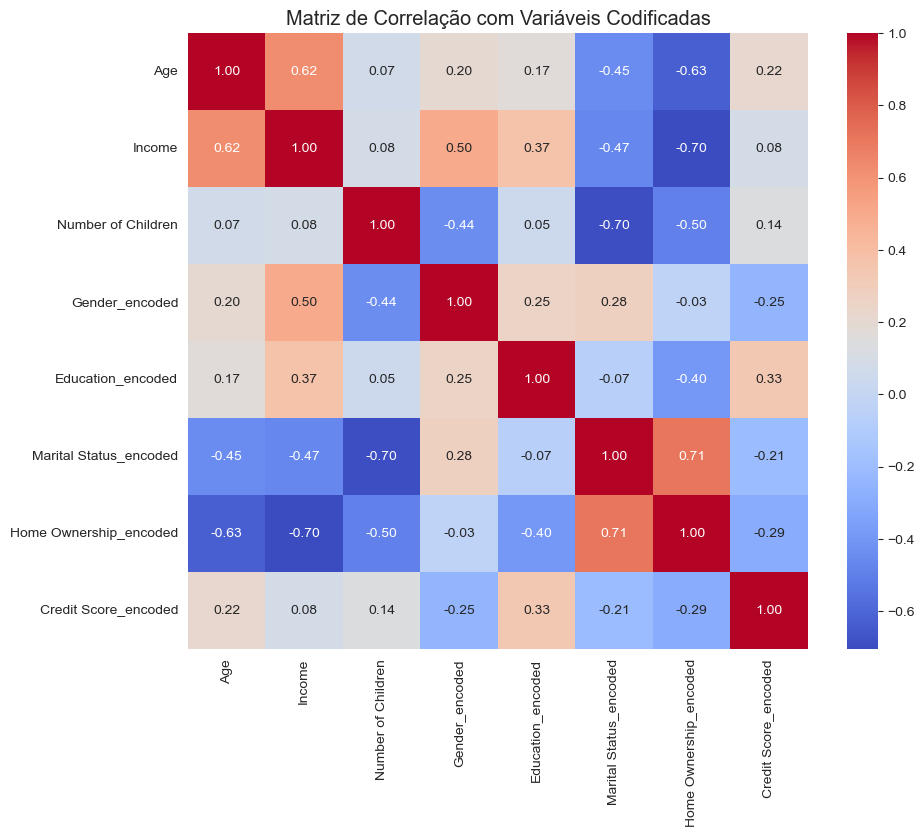


Correlações fortes (acima de 0.5 ou abaixo de -0.5):
                             Age    Income  Number of Children  \
Age                          NaN  0.621492                 NaN   
Income                  0.621492       NaN                 NaN   
Number of Children           NaN       NaN                 NaN   
Marital Status_encoded       NaN       NaN           -0.696984   
Home Ownership_encoded -0.628042 -0.704928                 NaN   

                        Marital Status_encoded  Home Ownership_encoded  
Age                                        NaN               -0.628042  
Income                                     NaN               -0.704928  
Number of Children                   -0.696984                     NaN  
Marital Status_encoded                     NaN                0.708374  
Home Ownership_encoded                0.708374                     NaN  


In [466]:
#seu código aqui
# Calcular a matriz de correlação com todas as variáveis numéricas (incluindo as codificadas)
correlation_matrix = df.corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação com Variáveis Codificadas')
plt.show()

# Identificar correlações fortes (acima de 0.5 ou abaixo de -0.5, excluindo a diagonal onde corr=1.0)
strong_correlations = correlation_matrix[(abs(correlation_matrix) > 0.5) & (correlation_matrix != 1.0)]
print("\nCorrelações fortes (acima de 0.5 ou abaixo de -0.5):")
print(strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1))

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [471]:
#seu código aqui
from sklearn.model_selection import train_test_split

# Separar as features (X) e o target (y)
X = df.drop(columns=['Credit Score_encoded'])  # Features: todas as colunas exceto o target
y = df['Credit Score_encoded']  # Target: Credit Score codificado

# Dividir o dataset em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar as dimensões dos conjuntos
print("Dimensões do conjunto de treino (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste (X_test, y_test):", X_test.shape, y_test.shape)

Dimensões do conjunto de treino (X_train, y_train): (131, 7) (131,)
Dimensões do conjunto de teste (X_test, y_test): (33, 7) (33,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

Contagem de cada classe na coluna 'Credit Score':
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


C:\Users\vinicius\AppData\Local\Temp\ipykernel_10112\3657611035.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit Score', data=df_original, palette='viridis')


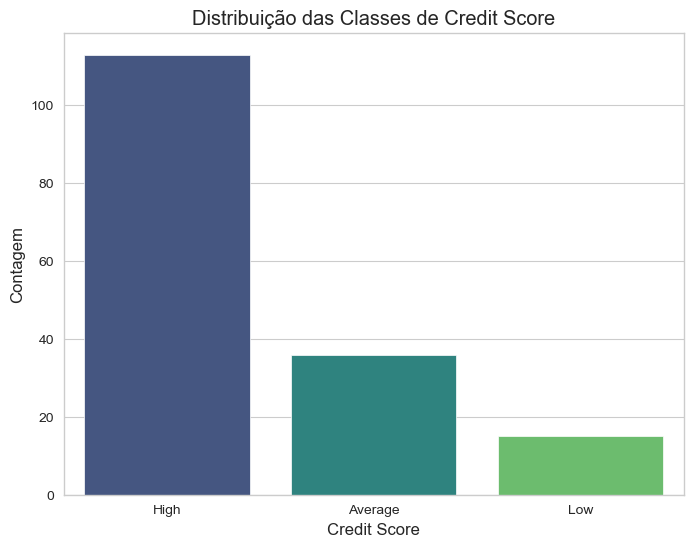

In [475]:
#seu código aqui
# Carregar o dataset original para acessar a coluna 'Credit Score' antes da codificação

# Verificar a distribuição da coluna 'Credit Score'
print("Contagem de cada classe na coluna 'Credit Score':")
print(df_original['Credit Score'].value_counts())

# Criar um gráfico de contagem para visualizar a distribuição
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit Score', data=df_original, palette='viridis')
plt.title('Distribuição das Classes de Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Contagem')
plt.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

Distribuição das classes em y_train antes do balanceamento:
Credit Score_encoded
1    90
0    29
2    12
Name: count, dtype: int64

Distribuição das classes em y_train após o balanceamento:
Credit Score_encoded
1    90
2    90
0    90
Name: count, dtype: int64


C:\Users\vinicius\AppData\Local\Temp\ipykernel_10112\2610790344.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
C:\Users\vinicius\AppData\Local\Temp\ipykernel_10112\2610790344.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette='viridis')


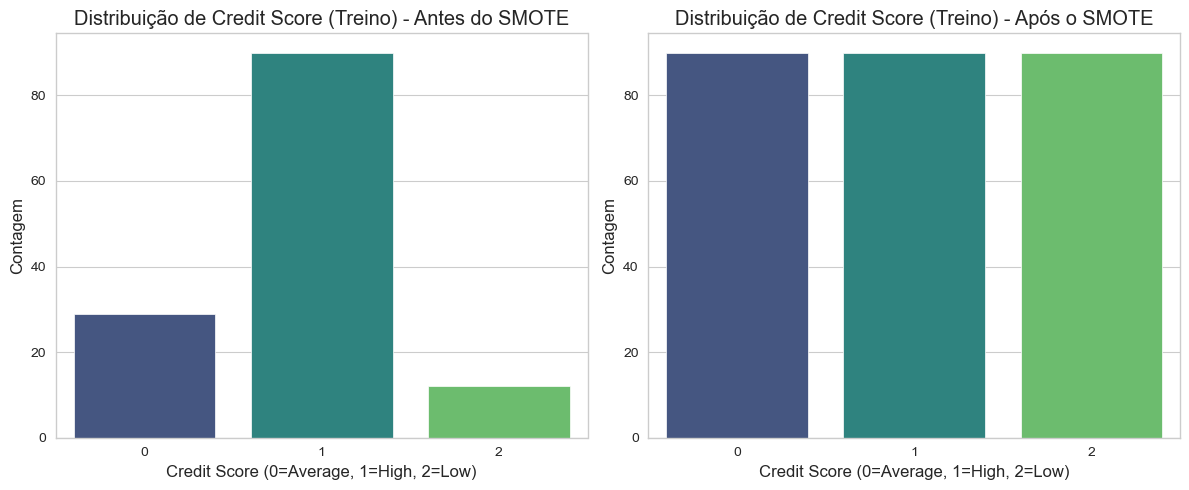

In [479]:
#seu código aqui
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assumindo que X_train, X_test, y_train, y_test já foram criados na Etapa 2F
# Exibir a distribuição das classes no conjunto de treino antes do balanceamento
print("Distribuição das classes em y_train antes do balanceamento:")
print(y_train.value_counts())

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Exibir a distribuição das classes no conjunto de treino após o balanceamento
print("\nDistribuição das classes em y_train após o balanceamento:")
print(pd.Series(y_train_balanced).value_counts())

# Criar um gráfico comparativo da distribuição das classes
plt.figure(figsize=(12, 5))

# Gráfico antes do balanceamento
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribuição de Credit Score (Treino) - Antes do SMOTE')
plt.xlabel('Credit Score (0=Average, 1=High, 2=Low)')
plt.ylabel('Contagem')

# Gráfico após o balanceamento
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced, palette='viridis')
plt.title('Distribuição de Credit Score (Treino) - Após o SMOTE')
plt.xlabel('Credit Score (0=Average, 1=High, 2=Low)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()